# Logistic Regression

In [64]:
from sklearn.datasets import make_classification

In [66]:
X, y = make_classification(n_samples =1000, n_features = 2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0)

In [68]:
X

array([[-1.30103286,  0.65069284],
       [-1.06343833,  0.88096554],
       [ 1.48408895,  0.36031152],
       ...,
       [ 2.50145689,  2.62326904],
       [-0.93717593,  1.2593352 ],
       [ 1.65239183,  1.20028382]])

In [70]:
y

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [72]:
import matplotlib.pyplot as plt

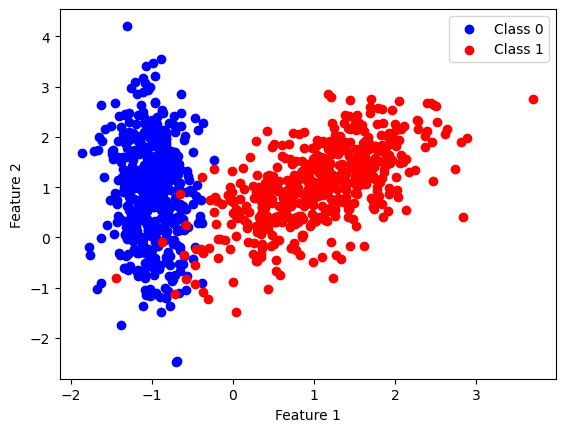

In [74]:
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], color="blue", label="Class 0")
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], color="red", label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [80]:
len(X_train)

800

In [82]:
len(X_test)

200

In [84]:
model = LogisticRegression()

In [86]:
model.fit(X_train, y_train)

LogisticRegression()

In [88]:
predictions = model.predict(X_test)

In [90]:
accuracy = accuracy_score(y_test, predictions)

In [92]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.98


# Hyperparameter Tuning using GridSearchCV

In [95]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["libliner", "saga"]
}

In [99]:
grid_search = GridSearchCV(model, param_grid, cv=2)

In [101]:
grid_search.fit(X_train, y_train)

C:\Users\suren\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\suren\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\suren\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\suren\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\suren\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\suren\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 f

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['libliner', 'saga']})

In [103]:
grid_search.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}

In [105]:
best_c = grid_search.best_params_["C"]
best_penalty = grid_search.best_params_["penalty"]
best_solver = grid_search.best_params_["solver"]

In [107]:
best_model = LogisticRegression(C = best_c, penalty = best_penalty, solver = best_solver)

In [109]:
best_model.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='saga')

In [111]:
predictions = best_model.predict(X_test)

In [113]:
accuracy = accuracy_score(y_test, predictions)

In [115]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.985


# Hyperparameter Tuning using Optuna

In [118]:
import optuna

In [152]:
# Objective function for Optuna
def objective(trial):
    C = trial.suggest_loguniform('C', 0.001, 100)  # Regularization strength
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])  # Regularization type

    # Ensure solver compatibility
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'

    model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [154]:
# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-03-01 11:39:31,892] A new study created in memory with name: no-name-0babf3df-c521-488d-aac3-88648b282771
C:\Users\suren\AppData\Local\Temp\ipykernel_15544\2739479209.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 100)  # Regularization strength
[I 2025-03-01 11:39:31,900] Trial 0 finished with value: 0.97 and parameters: {'C': 0.031356743101333365, 'penalty': 'l2'}. Best is trial 0 with value: 0.97.
C:\Users\suren\AppData\Local\Temp\ipykernel_15544\2739479209.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 100)  # Regularization strength
[I 2025-03-01 11:39:31,907] Trial 

In [156]:
study.best_params

{'C': 47.24376114712797, 'penalty': 'l2'}

In [158]:
study.best_value

0.99

In [160]:
best_params = study.best_params

In [162]:
best_model = LogisticRegression(**best_params)

In [164]:
best_model.fit(X_train, y_train)

LogisticRegression(C=47.24376114712797)

In [166]:
predictions = best_model.predict(X_test)

In [168]:
accuracy = accuracy_score(y_test, predictions)

In [170]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.99
